### Practica Neuroevolucion

## Integrantes

- Juan Jose Urioste
- Carlos Huerta Garcia
- Alejo Torres Teruel


VOY A DEJAR LAS IMAGENES QUE SAQUE ACA
TAMBIEN TENGO VIDEOS DE LAS MEJORES RUNS
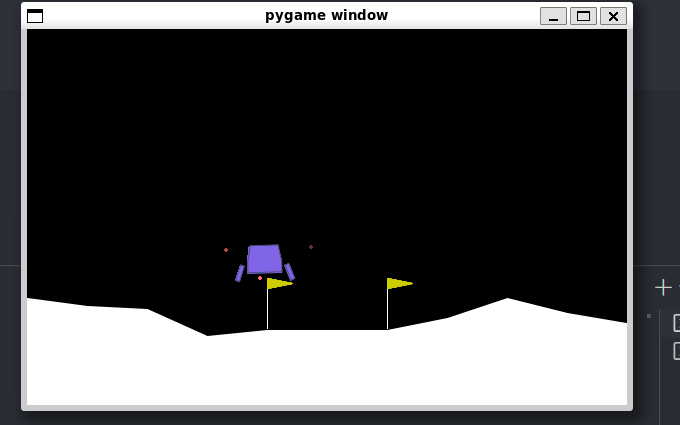

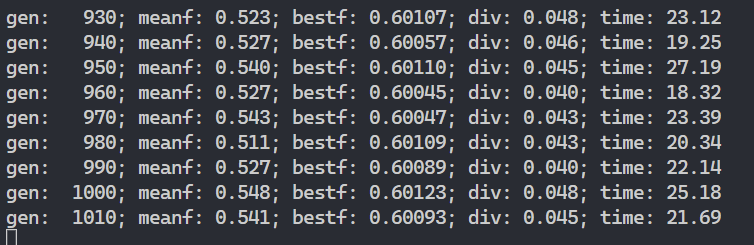

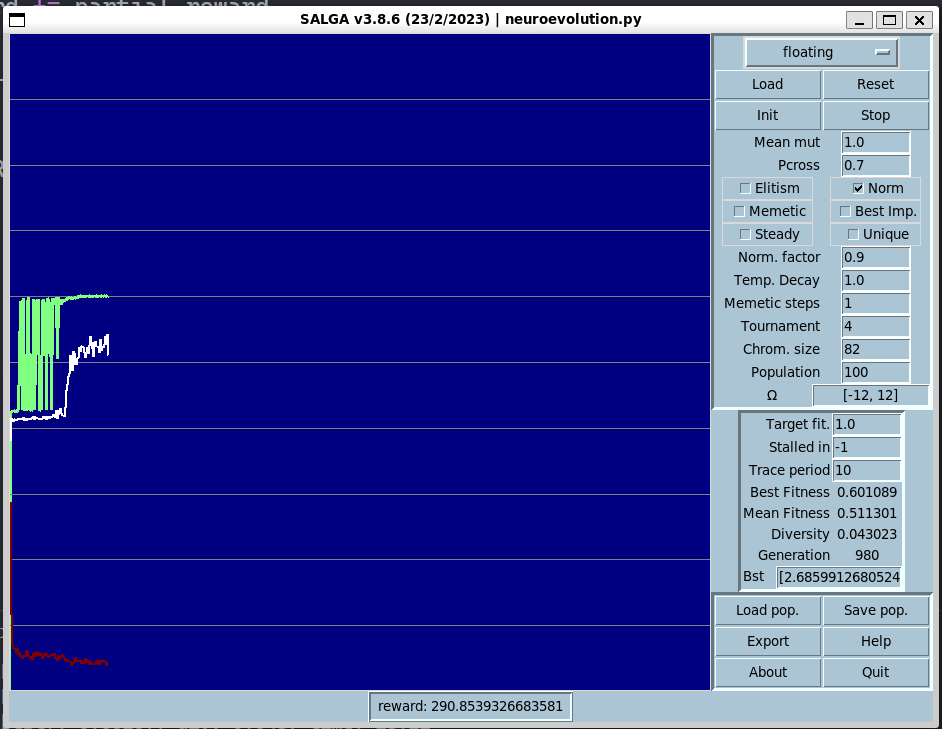

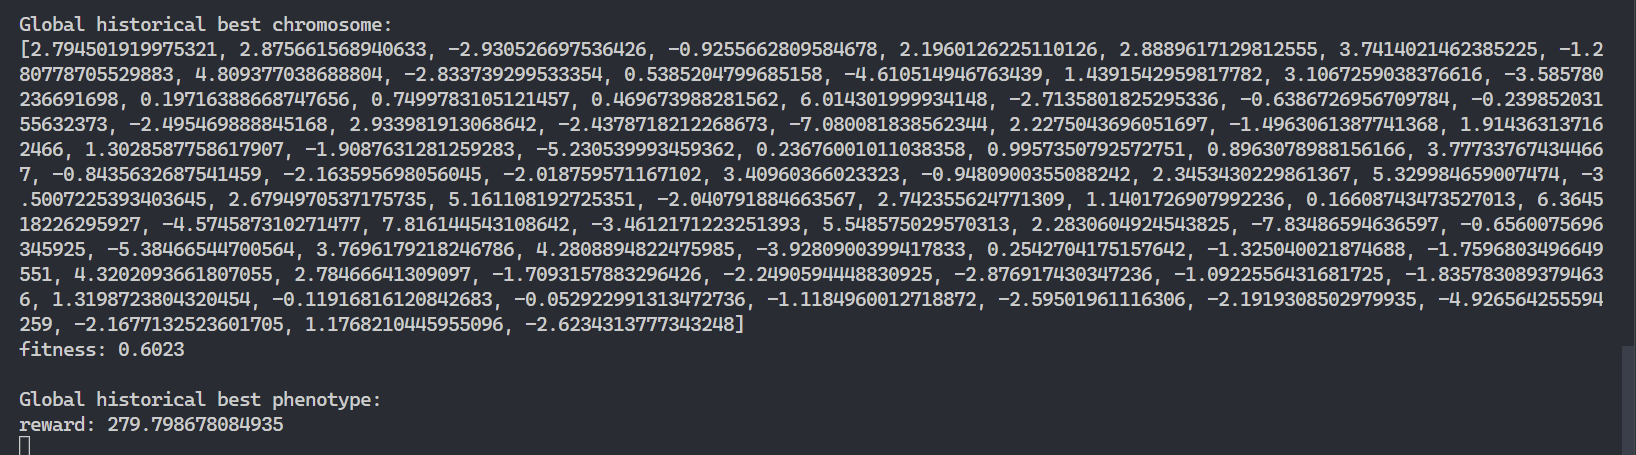

In [ ]:
# MEJORES PESOS PARA LA RED
chromosome = [2.794501919975321, 2.875661568940633, -2.930526697536426, -0.9255662809584678, 2.1960126225110126, 2.8889617129812555, 3.7414021462385225, -1.280778705529883, 4.809377038688804, -2.833739299533354, 0.5385204799685158, -4.610514946763439, 1.4391542959817782, 3.1067259038376616, -3.585780236691698, 0.19716388668747656, 0.7499783105121457, 0.469673988281562, 6.014301999934148, -2.7135801825295336, -0.6386726956709784, -0.23985203155632373, -2.495469888845168, 2.933981913068642, -2.4378718212268673, -7.080081838562344, 2.2275043696051697, -1.4963061387741368, 1.914363137162466, 1.3028587758617907, -1.9087631281259283, -5.230539993459362, 0.23676001011038358, 0.9957350792572751, 0.8963078988156166, 3.777337674344667, -0.8435632687541459, -2.163595698056045, -2.018759571167102, 3.40960366023323, -0.9480900355088242, 2.3453430229861367, 5.329984659007474, -3.5007225393403645, 2.6794970537175735, 5.161108192725351, -2.040791884663567, 2.742355624771309, 1.1401726907992236, 0.16608743473527013, 6.364518226295927, -4.574587310271477, 7.816144543108642, -3.4612171223251393, 5.548575029570313, 2.2830604924543825, -7.83486594636597, -0.6560075696345925, -5.38466544700564, 3.7696179218246786, 4.2808894822475985, -3.9280900399417833, 0.2542704175157642, -1.325040021874688, -1.7596803496649551, 4.3202093661807055, 2.78466641309097, -1.7093157883296426, -2.2490594448830925, -2.876917430347236, -1.0922556431681725, -1.8357830893794636, 1.3198723804320454, -0.11916816120842683, -0.052922991313472736, -1.1184960012718872, -2.59501961116306, -2.1919308502979935, -4.926564255594259, -2.1677132523601705, 1.1768210445955096, -2.6234313777343248]

## Instalación

!pip install gymnasium  
!pip install gymnasium[box2d] 

## Acciones adicionales

### En macos

pip uninstall swig  
xcode-select -—install (si no se tienen ya)  
pip install swig  
pip install 'gymnasium[box2d]' # en zsh hay que poner las comillas  

### en Windows

Si da error, se debe a la falta de la versión correcta de Microsoft Visual C++ Build Tools, que es una dependencia de Box2D. Para solucionar este problema, puede seguir los siguientes pasos:  
 * Descargar Microsoft Visual C++ Build Tools desde https://visualstudio.microsoft.com/visual-cpp-build-tools/.
 * Dentro de la app, seleccione la opción "Herramientas de compilación de C++" para instalar.
 * Reinicie su sesión en Jupyter Notebook.
 * Ejecute nuevamente el comando !pip install gymnasium[box2d] en la línea de comandos de su notebook.

 ## Utilizando un Contenedor de Docker
1. instalar WSL2 -> Es importante que sea la version 2 -> https://learn.microsoft.com/es-es/windows/wsl/install
2. decargar y configurar docker desde la pagina oficial https://docs.docker.com/desktop/install/windows-install/ -> desde la aplicacion de escritorio de docker (DockerDesktop) indicar en configuracion que se utilizara el backend de docker en **WSL2**
3. Instalar VSCode
4. dentro de VSCode instalar la extension de remote containers
5. Dentro de una nueva carpeta copiar y pegar la carpeta de *.devcontainer* y el archivo *requirements.txt*

El archivo *.devcontainer.json* describe una abstraccion por encima del conteneder de docker llamadas devcontainers, dentro estan especificados todos los comandos para instalar las dependencias necesarias del entorno, la imagen base y los usuarios remotos (dentro se pueden especificar todas las cosas que encontrarias normalmente en un fichero docker)

6. Por ultimo reinciar VSCode dentro de la carpeta en cuestion o correr el comando *>Reopen in Container* dentro del editor -> (Con la tecla F1 abren la paleta de comandos) La segunda vez que lo abran deberia darles un alert con una opcion de re-abrir dentro del contenedor

**Nota:** Si estas utilizando la ultima version de WSL2 en windows,no deberias realizar ninguna configuracion adicional para exponer la direccion del Display de tu ordenador en el contenedor, ya que esta se hace automaticamente. En caso de ser necesario, referirse a [este enlace](https://aalonso.dev/blog/how-to-use-gui-apps-in-wsl2-forwarding-x-server-cdj)

# Control Manual

una implementacion que permite controlar el agente con el teclado utilizando *EventListeners* de **Pygame**

In [14]:
# prueba lunar lander por humano
# apartado A de la práctica

import gymnasium as gym
import pygame
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()


done = False
while True:
    env.render()
    action = 0 
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                action = 3
            elif event.key == pygame.K_RIGHT:
                action = 1
            elif event.key == pygame.K_UP:
                action = 2
            else:
                action = 0 
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        done = True
        break

env.close()

# Usando Reglas de Control

In [15]:
class ExpertSystem:
  def __init__(self, observation):
    x, y, vx, vy, angle, angular_velocity, left_leg, right_leg = observation
    self.isRotating = abs(angular_velocity) > 0.15
    self.isMoving = abs(vx) > 0.15
    self.isLeaving = vy > 0.15
    self.isLeft = x < -0.15
    self.isRight = x > 0.15
    self.isForward = angle > 0.3
    self.isBackward = angle < -0.3
    self.isAtBase = y < 0.025
    self.isUp = y < 0.8 and vy < -0.025
    self.won = left_leg == 1 and right_leg == 1 and self.isAtBase and not self.isLeft and not self.isRight

def step(observation):
  rules = ExpertSystem(observation)
  if rules.won:
    return 0, True
  if not rules.isAtBase and rules.isUp and not rules.isLeaving:
    return 2, False
  if rules.isRotating:
    if rules.isForward:
      return 3, False
    elif rules.isBackward:
      return 1, False
  if rules.isMoving:
    if rules.isRight:
      return 3, False
    else:
      return 1, False
  return 0, False
    
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
count = 0
while(count < 10):
    action,won = step(observation)  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
      count += 1
      if won: print("Landed!")
      observation, info = env.reset()
env.close()

Landed!
Landed!


## Notas
Las observaciones que el agente obtiene del entorno son las siguientes:
```python
 x, y, vx, vy, angle, vangle, left_leg, right_leg = observation
 ```

- x, y: Posición del centro de masa del agente.
- vx, vy: Velocidad del centro de masa del agente.
- angle: Ángulo de la dirección del agente.
- vangle: Velocidad angular del agente.
- left_leg, right_leg: indicadores si el agente esta tocando el suelo.

Las acciones posibles son:
[nada, derecho, central, izquierdo]
## Esquema
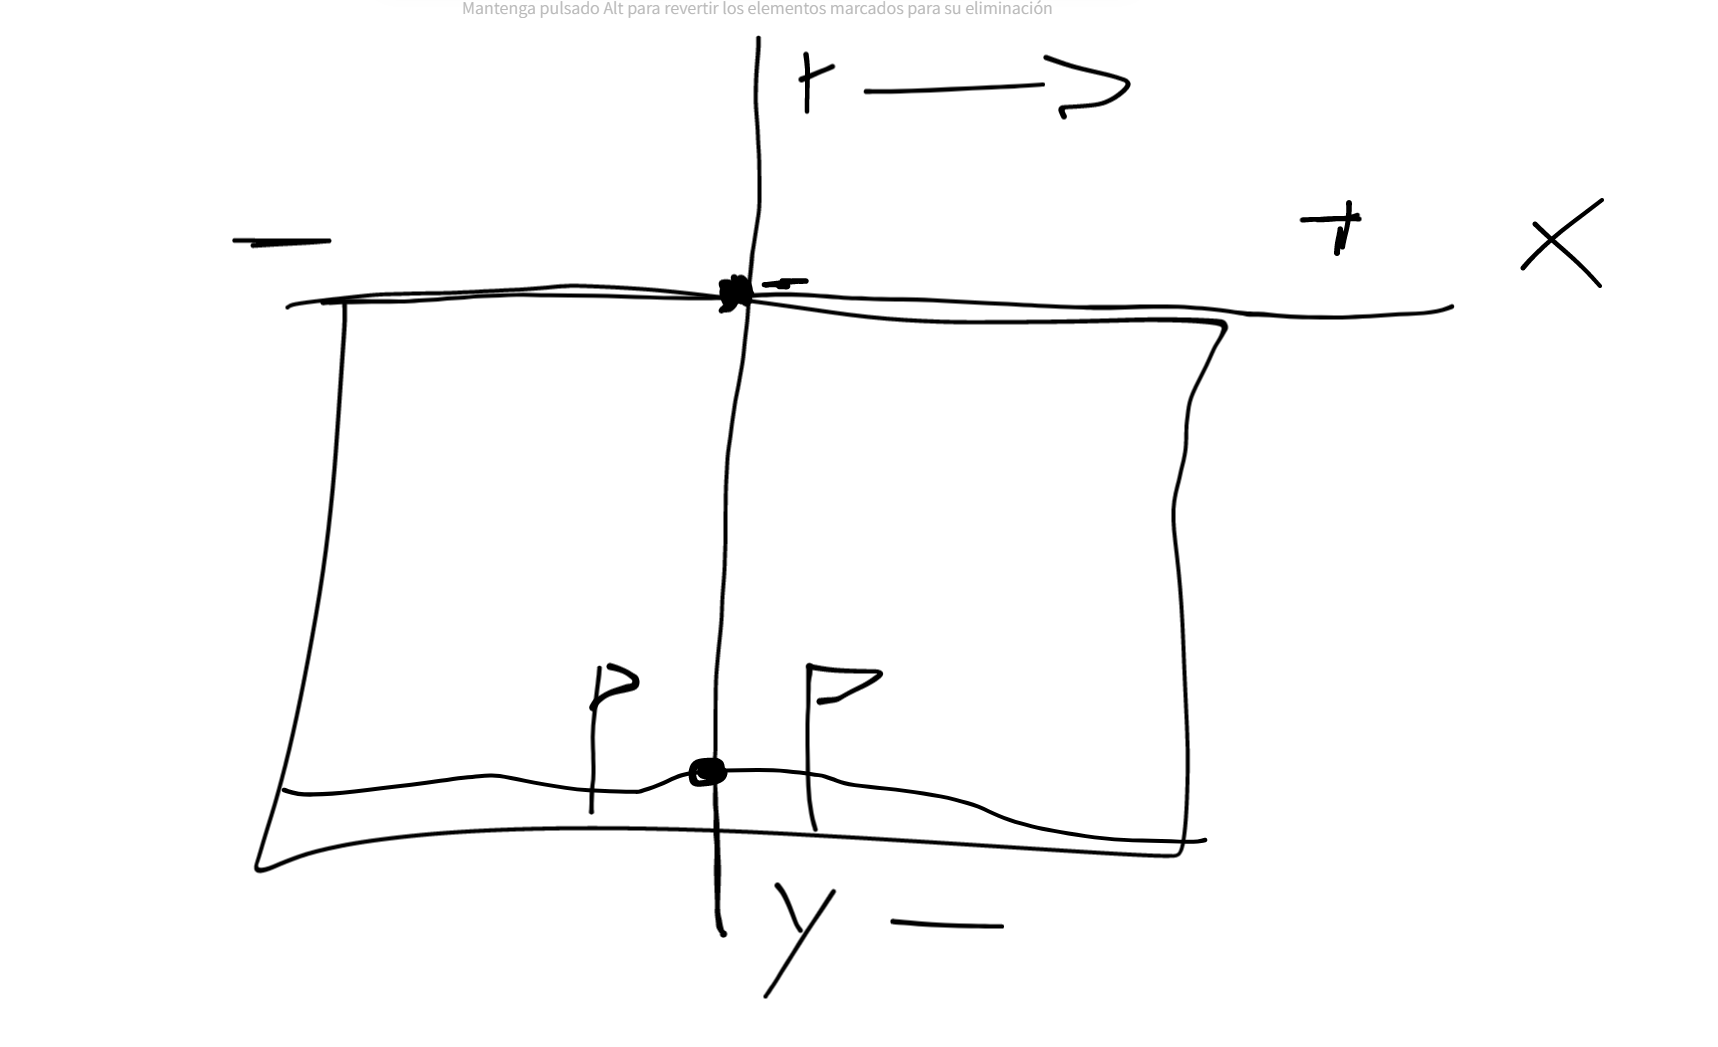


# Neuroevolucion

Utilizaremos un algortimo genetico para entrenar los pesos de un perceptron multicapa que sera el encargado de tomar las decisiones del agente.

Usaremos la Implementacino de MLP usada en la practica 1 de AAII


Agregamos 2 metodos nuevos a la clase MLP para poder cargar y guardar los pesos de la red neuronal apartir del cromosoma.
  
  ```python
   def from_chromosome(self, chromosome):
        self.W1 = np.array(chromosome[:self.ninput*self.nhidden]).reshape(self.W1.shape)
        chromosome = chromosome[self.ninput*self.nhidden:]
        self.b1 = np.array(chromosome[:self.nhidden])
        chromosome = chromosome[self.nhidden:]
        self.W2 = np.array(chromosome[:self.nhidden*self.noutput]).reshape(self.nhidden, self.noutput)
        chromosome = chromosome[self.nhidden*self.noutput:]
        self.b2 = np.array(chromosome[:self.noutput])
  ```
a partir de un cromosoma, que en este caso es de longitud fija(aunque podriamos implementarlo de forma que la arquitectura de la red tambien varia y por ende la forma de cromosoma tambien) reconstruimos las matrices de pesos y vectores de bias para la arquitectura definida en un principio, valiendonos del numero de neuronas en la capa de entrada, en la capa oculta y en la salida

```python
    def to_chromosome(self):
        return np.concatenate((self.w1.flatten(), self.b1.flatten(), self.w2.flatten(), self.b2.flatten()))
```

y a la inversa, a partir de las matrices de pesos y vectores de bias, construimos un cromosoma que sera el que se guarde en la poblacion,aplanando los tensores de numpy.


A continuacion se describe el codigo que sera cargado en salga para ejecutar el algoritmo genetico

In [ ]:
# neuroevolución
from models.Multilayer import Multilayer #! Modelo de AAII
import gymnasium as gym
import numpy as np


CHROMSIZE = 8 * 6 + 6 + 6 * 4 + 4 #! numero de pesos y bias
N = 10  # number of episodes to average


env = gym.make("LunarLander-v2")  # fitness environment
model = Multilayer(8, 6, 4)  # 8 inputs, 6 hidden neurons, 4 outputs


# phenotype environment
graphical_env = gym.make("LunarLander-v2", render_mode="human")
phenotype_model = Multilayer(8, 6, 4)


def step(env, model, observation) -> tuple:
    env.render()
    action = model.inference(observation)
    observation, reward, terminated, truncated, info = env.step(
        np.argmax(action))
    return observation, reward, terminated, truncated, info


def phenotype(chromosome):
    observation, info = graphical_env.reset()
    phenotype_model.from_chromosome(chromosome)
    observation, info = graphical_env.reset()
    partial_reward = 0
    while True:
        observation, reward, terminated, truncated, info = step(
            graphical_env, phenotype_model, observation)
        partial_reward += reward
        if terminated or truncated:
            break
    return f'reward: {partial_reward}'


def fitness(chromosome):
    model.from_chromosome(chromosome)
    observation, info = env.reset()
    total_reward = 0
    for _ in range(N):
        partial_reward = 0
        while True:
            observation, reward, terminated, truncated, info = step(
                env, model, observation)
            partial_reward += reward
            if terminated or truncated:
                break
        partial_reward += 600  # add 600 points for each episode
        partial_reward /= 1200  # normalize to [0, 1]
        total_reward += partial_reward
    env.close()
    return total_reward / N if total_reward > 0 else 0


parameters = {'alphabet': [-12, 12], 'type': 'floating', 'norm': True, 'chromsize': CHROMSIZE,
              'pmut': 1./(CHROMSIZE), 'popsize': 100, 'trace': 10, 'tournament': 4}


In [ ]:
# prueba lunar lander por agente

import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="human")

def run ():
    #observation, info = env.reset(seed=42)
    observation, info = env.reset()
    ite = 0
    racum = 0
    while True:
        action = policy(observation)    
        observation, reward, terminated, truncated, info = env.step(action)
        
        racum += reward

        if terminated or truncated:
            r = (racum+200) / 500
            print(racum, r)
            return racum
    
#run()

In [ ]:
N = 10
r = 0
for _ in range(N):
    r += run()
    
print(r/N)

In [ ]:
# walker

env = gym.make("BipedalWalker-v3", render_mode="human") # hardcore=True
...